## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
labels = '../Tabular_data/dengue_tabular.csv'

#Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 70
T=3
autoregressive = False

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='late'):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'

In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (114, 2049)
The test shape is: (50, 2049)
The shape of the features is (111, 6147)
The shape of the labels is (111, 1)
The shape of the features is (47, 6147)
The shape of the labels is (47, 1)
The initial shapes are:
The train shape is (111, 6147)
The test shape is (47, 6147)
-----------------------
The Final sha

2023-02-21 21:27:41.172754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-21 21:27:41.172799: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-21 21:27:41.172823: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-21 21:27:41.173020: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 21:27:45.238076: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_input (InputLayer)         [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_2_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 1)            15360971    lstm_input[0][0]                 
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 1)            7168971     lstm_2_input[0][0]               
__________

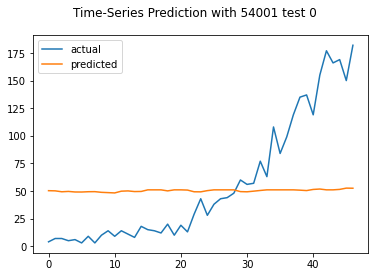

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_4_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_6_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 1)            15360971    lstm_4_input[0][0]               
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 1)            7168971     lstm_6_input[0][0]               
________

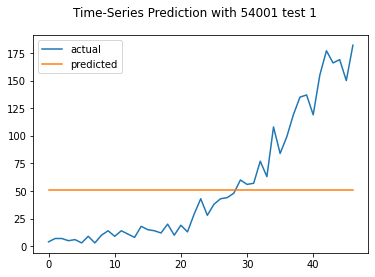

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_8_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_10_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 1)            15360971    lstm_8_input[0][0]               
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 1)            7168971     lstm_10_input[0][0]              
________

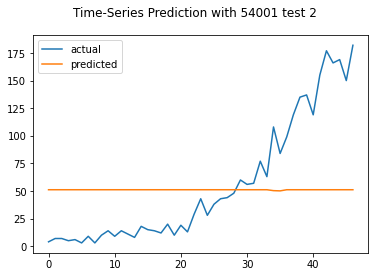

rmse : average=56.321, std=0.270
mape : average=279.908, std=4.175
smape : average=93.479, std=0.311
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
###########################################################################################

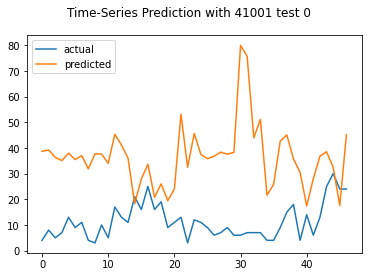

Restoring model weights from the end of the best epoch.
Epoch 00098: early stopping
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_16_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_18_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 1)            15360971    lstm_16_input[0][0]              
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 1)            7168971     lstm_18_input[0][0]              
________

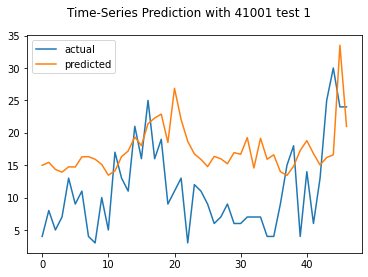

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_20_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_22_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 1)            15360971    lstm_20_input[0][0]              
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 1)            7168971     lstm_22_input[0][0]              
____________________________________________________________________________________________

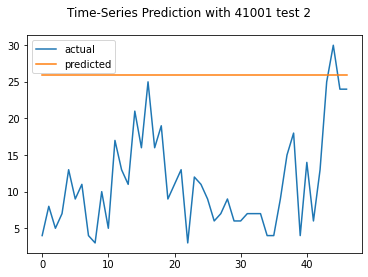

rmse : average=18.002, std=8.530
mape : average=235.995, std=101.219
smape : average=85.244, std=18.974
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
########################################################################################

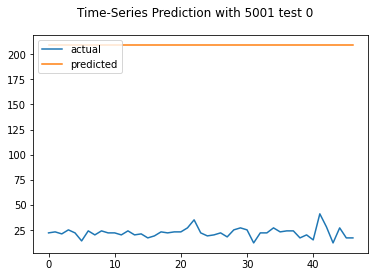

Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_28_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_30_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 1)            15360971    lstm_28_input[0][0]              
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 1)            7168971     lstm_30_input[0][0]              
________

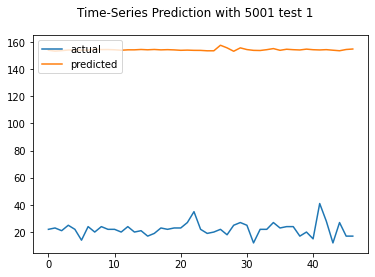

Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_32_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_34_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 1)            15360971    lstm_32_input[0][0]              
__________________________________________________________________________________________________
sequential_17 (Sequential)      (None, 1)            7168971     lstm_34_input[0][0]              
________

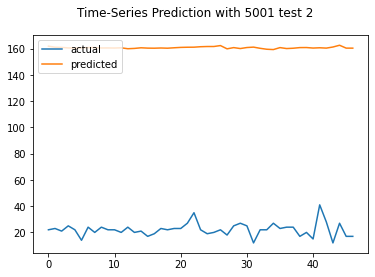

rmse : average=152.636, std=24.458
mape : average=731.576, std=116.512
smape : average=154.642, std=5.194
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
######################################################################################

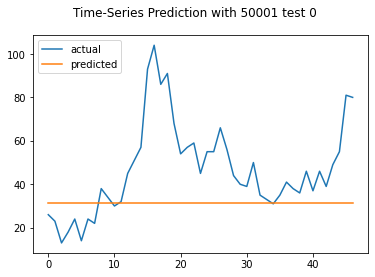

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_40_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_42_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 1)            15360971    lstm_40_input[0][0]              
__________________________________________________________________________________________________
sequential_21 (Sequential)      (None, 1)            7168971     lstm_42_input[0][0]              
_______

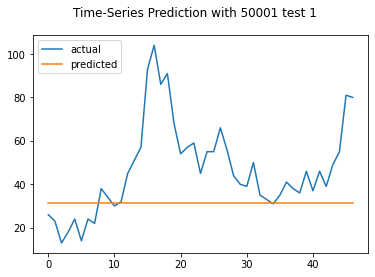

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_44_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_46_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_22 (Sequential)      (None, 1)            15360971    lstm_44_input[0][0]              
__________________________________________________________________________________________________
sequential_23 (Sequential)      (None, 1)            7168971     lstm_46_input[0][0]              
_______

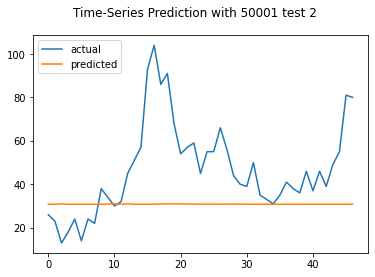

rmse : average=25.976, std=0.135
mape : average=38.404, std=0.160
smape : average=43.807, std=0.410
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
############################################################################################

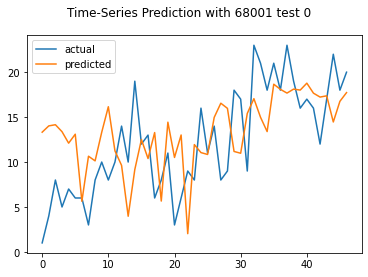

Restoring model weights from the end of the best epoch.
Epoch 00073: early stopping
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_52_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_54_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_26 (Sequential)      (None, 1)            15360971    lstm_52_input[0][0]              
__________________________________________________________________________________________________
sequential_27 (Sequential)      (None, 1)            7168971     lstm_54_input[0][0]              
_______

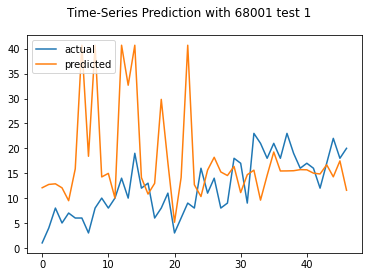

Restoring model weights from the end of the best epoch.
Epoch 00078: early stopping
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_56_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_58_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 1)            15360971    lstm_56_input[0][0]              
__________________________________________________________________________________________________
sequential_29 (Sequential)      (None, 1)            7168971     lstm_58_input[0][0]              
_______

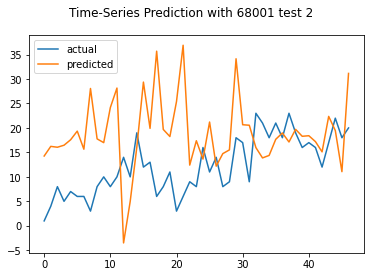

rmse : average=9.871, std=3.018
mape : average=118.710, std=29.979
smape : average=54.526, std=8.139
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
###########################################################################################

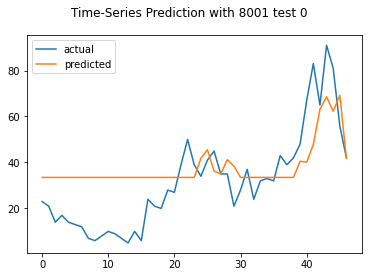

Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_64_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_66_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_32 (Sequential)      (None, 1)            15360971    lstm_64_input[0][0]              
__________________________________________________________________________________________________
sequential_33 (Sequential)      (None, 1)            7168971     lstm_66_input[0][0]              
_______

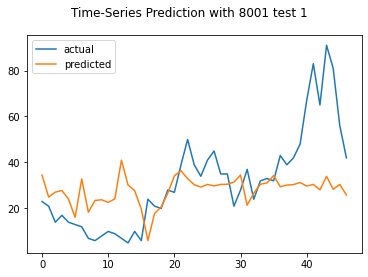

Restoring model weights from the end of the best epoch.
Epoch 00090: early stopping
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_68_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_70_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_34 (Sequential)      (None, 1)            15360971    lstm_68_input[0][0]              
__________________________________________________________________________________________________
sequential_35 (Sequential)      (None, 1)            7168971     lstm_70_input[0][0]              
_______

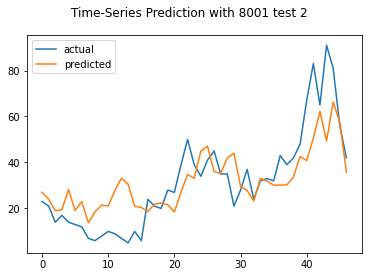

rmse : average=16.727, std=2.734
mape : average=82.512, std=16.130
smape : average=46.999, std=6.031
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
###########################################################################################

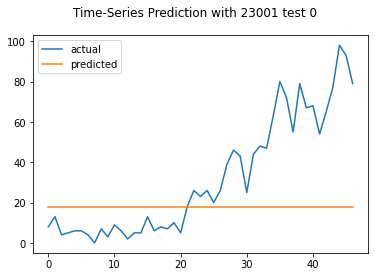

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_76_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_78_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_38 (Sequential)      (None, 1)            15360971    lstm_76_input[0][0]              
__________________________________________________________________________________________________
sequential_39 (Sequential)      (None, 1)            7168971     lstm_78_input[0][0]              
_______

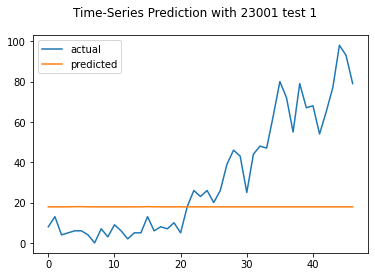

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_80_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_82_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_40 (Sequential)      (None, 1)            15360971    lstm_80_input[0][0]              
__________________________________________________________________________________________________
sequential_41 (Sequential)      (None, 1)            7168971     lstm_82_input[0][0]              
_______

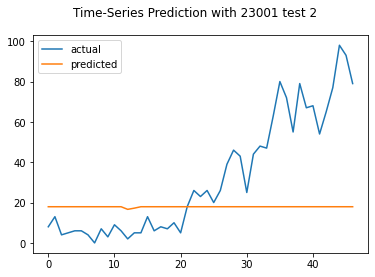

rmse : average=32.364, std=0.020
mape : average=inf, std=nan
smape : average=92.880, std=0.079
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
#################################################################################################

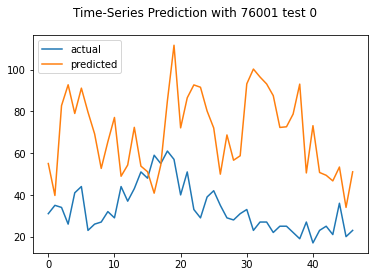

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_88_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_90_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_44 (Sequential)      (None, 1)            15360971    lstm_88_input[0][0]              
__________________________________________________________________________________________________
sequential_45 (Sequential)      (None, 1)            7168971     lstm_90_input[0][0]              
___________________________________________________________________________________________

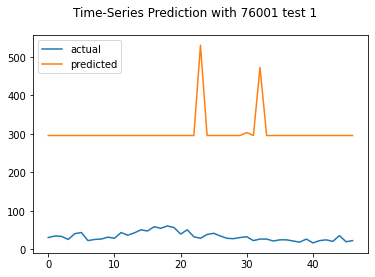

Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_92_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_94_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_46 (Sequential)      (None, 1)            15360971    lstm_92_input[0][0]              
__________________________________________________________________________________________________
sequential_47 (Sequential)      (None, 1)            7168971     lstm_94_input[0][0]              
_______

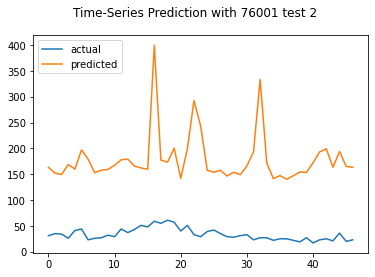

rmse : average=156.604, std=94.978
mape : average=507.176, std=317.725
smape : average=122.358, std=37.936
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
#####################################################################################

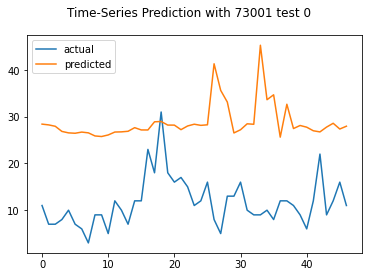

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_100_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_102_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_50 (Sequential)      (None, 1)            15360971    lstm_100_input[0][0]             
__________________________________________________________________________________________________
sequential_51 (Sequential)      (None, 1)            7168971     lstm_102_input[0][0]             
___________________________________________________________________________________________

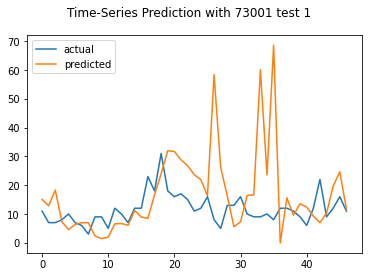

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_104_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_106_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_52 (Sequential)      (None, 1)            15360971    lstm_104_input[0][0]             
__________________________________________________________________________________________________
sequential_53 (Sequential)      (None, 1)            7168971     lstm_106_input[0][0]             
_______

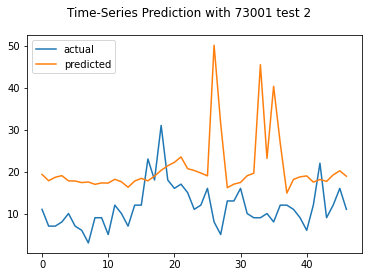

rmse : average=15.792, std=2.230
mape : average=141.033, std=42.307
smape : average=70.591, std=12.700
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
#########################################################################################

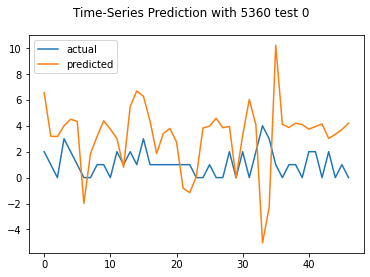

Restoring model weights from the end of the best epoch.
Epoch 00058: early stopping
Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_112_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_114_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_56 (Sequential)      (None, 1)            15360971    lstm_112_input[0][0]             
__________________________________________________________________________________________________
sequential_57 (Sequential)      (None, 1)            7168971     lstm_114_input[0][0]             
_______

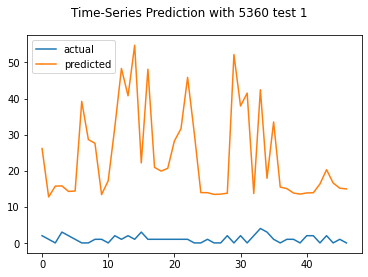

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_116_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_118_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_58 (Sequential)      (None, 1)            15360971    lstm_116_input[0][0]             
__________________________________________________________________________________________________
sequential_59 (Sequential)      (None, 1)            7168971     lstm_118_input[0][0]             
___________________________________________________________________________________________

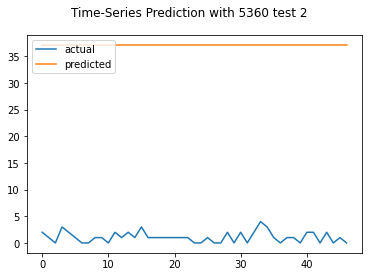

rmse : average=21.995, std=13.613
mape : average=inf, std=nan
smape : average=168.140, std=23.786
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='joint')

In [7]:
results

{54001: {'rmse': [56.32078937060462, 0.2701039474148908],
  'mape': [279.9079542811043, 4.174796838556364],
  'smape': [93.47917505152638, 0.31084556140532216]},
 41001: {'rmse': [18.001929228512697, 8.530143072940666],
  'mape': [235.9948169207139, 101.21850732889006],
  'smape': [85.24359756261263, 18.973945419675143]},
 5001: {'rmse': [152.6363071499084, 24.45815353153853],
  'mape': [731.575621642611, 116.51205560178407],
  'smape': [154.64246363008309, 5.193542396224947]},
 50001: {'rmse': [25.975558084175166, 0.1348593094792903],
  'mape': [38.40407757664874, 0.1597545889136539],
  'smape': [43.80707375389943, 0.4098658545532891]},
 68001: {'rmse': [9.870648792021107, 3.0176774950577556],
  'mape': [118.70963479583035, 29.978621473278675],
  'smape': [54.52562824457228, 8.139073298786023]},
 8001: {'rmse': [16.727123665467797, 2.7338254313917956],
  'mape': [82.51203935011041, 16.130220029799144],
  'smape': [46.99948353566169, 6.031437697650784]},
 23001: {'rmse': [32.3644407263